# Anomaly Detection

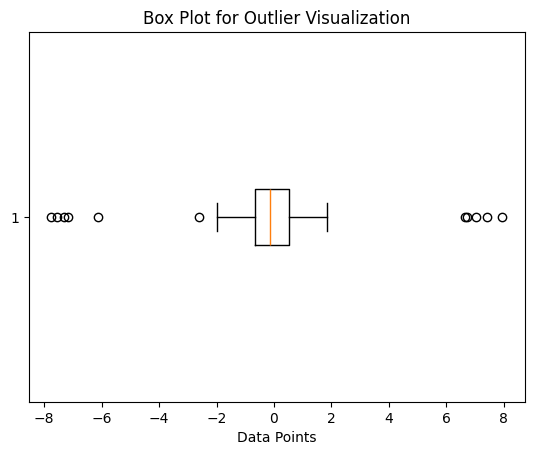

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate example data with outliers
np.random.seed(42)

# Generate normally distributed data
normal_data = np.random.normal(loc=0, scale=1, size=100) 

# Introduce outliers
outliers_low = np.random.uniform(low=-8, high=-6, size=5)
outlers_high = np.random.uniform(low=6, high=8, size=5)

# Combine normal data with outliers
data = np.concatenate([normal_data, outliers_low, outlers_high])

# Create a box plot to visualize outliers
plt.boxplot(data, vert=False)
plt.title('Box Plot for Outlier Visualization')
plt.xlabel('Data Points')
plt.show()
